# 1. Import 

In [ ]:
!pip install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

# 2. Load Data

In [ ]:
train = pd.read_csv("/work/dataset_penyisihan_bdc_2024.csv", sep=";")
test = pd.read_csv("/work/dataset_unlabeled_penyisihan_bdc_2024.csv", sep=";")

# 3. Descriptive Statistics

In [ ]:
train

,text,label
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik
...,...,...
4995,RT @l1DsGGe2xObT3t72dHwqlT58X7jvEYtEnauZIZSYwS...,Politik
4996,Masyarakat yakin bahwa Prabowo-Gibran memiliki...,Politik
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi
4998,@cIIGSdjaPrmAQY1E4gWnLpIZSdyQn8ZMhjJzgOsxfRM= ...,Pertahanan dan Keamanan


In [ ]:
test

,IDText,Text
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...
...,...,...
995,TXT0996,"Bikin bangga deh, Ganjar-Mahfud mau alokasikan..."
996,TXT0997,Pak Jokowi sebelum pilpres 2024 berbesar hati ...
997,TXT0998,@datuakrajoangek Sbaiknya si gemot nga usah ik...
998,TXT0999,kebiasaan merembuk atau bermusyawarah jadi gay...


## 3.1 Distribution of text length

<AxesSubplot: xlabel='text_length', ylabel='Count'>

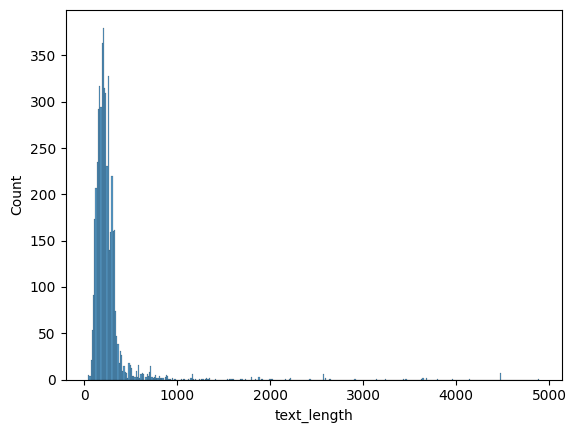

In [ ]:
# Rata-rata panjang text
train["text_length"] = train["text"].str.len()

sns.histplot(train["text_length"])

## 3.2 Distribution of text length under 1000

In [ ]:
train_textunder1000 = train[train["text"].str.len() < 1000]
train_textunder1000

,text,label,text_length
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,184
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik,184
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi,254
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik,301
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik,101
...,...,...,...
4995,RT @l1DsGGe2xObT3t72dHwqlT58X7jvEYtEnauZIZSYwS...,Politik,168
4996,Masyarakat yakin bahwa Prabowo-Gibran memiliki...,Politik,156
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi,219
4998,@cIIGSdjaPrmAQY1E4gWnLpIZSdyQn8ZMhjJzgOsxfRM= ...,Pertahanan dan Keamanan,246


/tmp/ipykernel_175/1253848360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_textunder1000["text_length"] = train_textunder1000["text"].str.len()


<AxesSubplot: xlabel='text_length', ylabel='Count'>

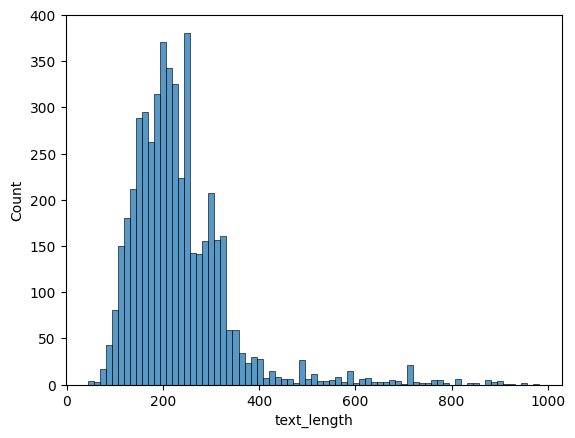

In [ ]:
# Rata-rata panjang text
train_textunder1000["text_length"] = train_textunder1000["text"].str.len()

sns.histplot(train_textunder1000["text_length"])

# 4. Balance of Data

In [ ]:
train["label"].value_counts()

label
Politik                    2972
Sosial Budaya               587
Pertahanan dan Keamanan     400
Ideologi                    400
Ekonomi                     367
Sumber Daya Alam            192
Demografi                    62
Geografi                     20
Name: count, dtype: int64

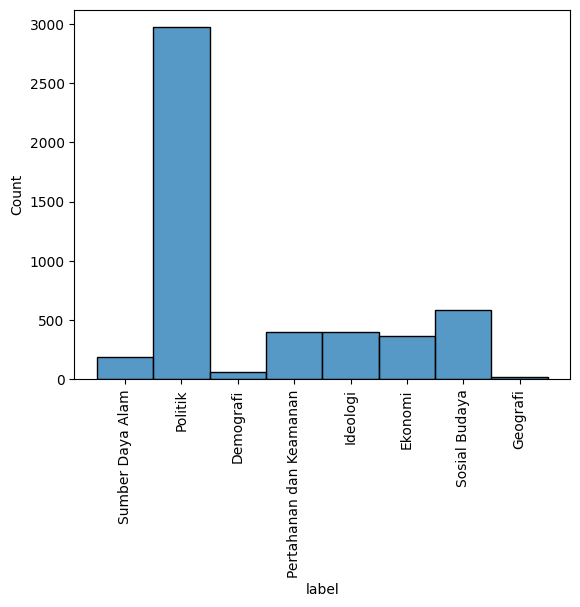

In [ ]:
sns.histplot(train["label"])
plt.xticks(rotation=90)
plt.show()

From histogram of label distribution, we know that this dataset is imbalance, with 'Politik' became the majority class. Therefore, there is a space to increase performance by handle the imbalance data

# 5. Missing Value Detection

In [ ]:
train.isna().sum()

text           0
label          0
text_length    0
dtype: int64

In [ ]:
test.isna().sum()

IDText    0
Text      0
dtype: int64

There are no missing value in both data

# 6. Duplicated Value Detection

In [ ]:
train.duplicated().sum()

381

In [ ]:
train[train.duplicated()]

,text,label,text_length
57,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya,168
104,"RT Anak Muda Indonesia, the future of this nat...",Ideologi,328
145,"RT Pupuk bersubsidi langka, Tim Prabowo Gibran...",Ekonomi,291
146,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya,168
189,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya,168
...,...,...,...
4917,"RT Ini kejam, warga disitu sudah bersedia diba...",Sosial Budaya,302
4933,RT Karena program pak anies yg ini. Bapak gw j...,Sumber Daya Alam,304
4955,RT Ekonom: Program Makan Siang dan Susu Gratis...,Ekonomi,159
4971,"RT menjelang tengah malam ini, aku mau ucapkan...",Ideologi,2578


In [ ]:
train[train.text == train.iloc[57].text]

,text,label,text_length
20,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya,168
57,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya,168
146,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya,168
189,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya,168
220,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya,168
433,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya,168
450,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya,168
499,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya,168
622,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya,168
689,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya,168


In [ ]:
train.iloc[57].text

'RT Abah Anies ingin mengangkat martabat petani agar tidak terus menerus menerima bansos karena penghasilannya cukup.. #AMINAjaDulu https://t.co/txIvBhLvn2 [RE ekowboy2]'

In [ ]:
train.iloc[20].text

'RT Abah Anies ingin mengangkat martabat petani agar tidak terus menerus menerima bansos karena penghasilannya cukup.. #AMINAjaDulu https://t.co/txIvBhLvn2 [RE ekowboy2]'

There are 381 duplicated data in train dataset

# 7. Distribution of length by class

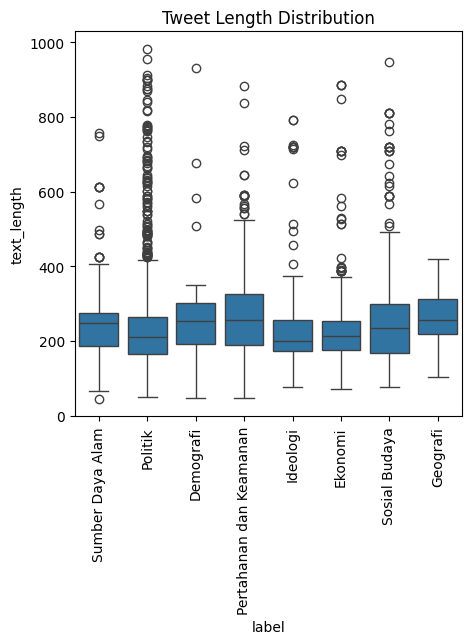

,max,min,mean,std
label,,,,
Demografi,931,48,258.683333,139.313023
Ekonomi,886,72,234.447222,118.829306
Geografi,420,104,268.650000,77.190997
Ideologi,791,78,223.981818,103.717124
Pertahanan dan Keamanan,882,46,274.457071,119.303106
Politik,982,50,226.919755,101.897549
Sosial Budaya,947,76,254.508803,126.145237
Sumber Daya Alam,758,45,248.452632,109.939114


/tmp/ipykernel_175/2163263311.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_textunder1000['word_count'] = train_textunder1000['text'].apply(lambda x: len(str(x).split()))


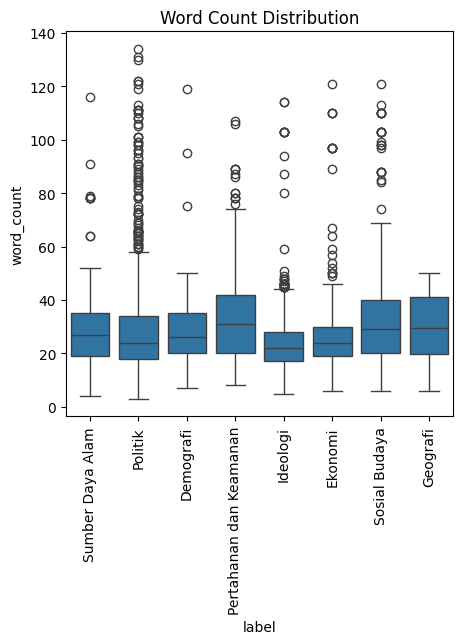

,max,min,mean,std
label,,,,
Demografi,119,7,31.416667,19.029230
Ekonomi,121,6,26.991667,15.827498
Geografi,50,6,30.300000,12.884507
Ideologi,114,5,26.340260,15.580806
Pertahanan dan Keamanan,107,8,33.166667,16.291102
Politik,134,3,27.526012,14.576484
Sosial Budaya,121,6,32.209507,18.803545
Sumber Daya Alam,116,4,29.484211,16.241148


In [ ]:
# display tweet length distribution for each label
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Tweet Length Distribution")
plt.xticks(rotation=90)
sns.boxplot(x='label', y='text_length', data=train_textunder1000, ax=ax)
plt.show()

# display max, min, mean, and std of length for each label
df_length = train_textunder1000.groupby(['label'])['text_length'].agg(['max', 'min', 'mean', 'std'])
display(df_length)

# display word count distribution for each label
train_textunder1000['word_count'] = train_textunder1000['text'].apply(lambda x: len(str(x).split()))
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x='label', y='word_count', data=train_textunder1000, ax=ax)
plt.title("Word Count Distribution")
plt.xticks(rotation=90)
plt.show()

# display max, min, mean, and std of word count for each label
df_word_count = train_textunder1000.groupby(['label'])['word_count'].agg(['max', 'min', 'mean', 'std'])
display(df_word_count)


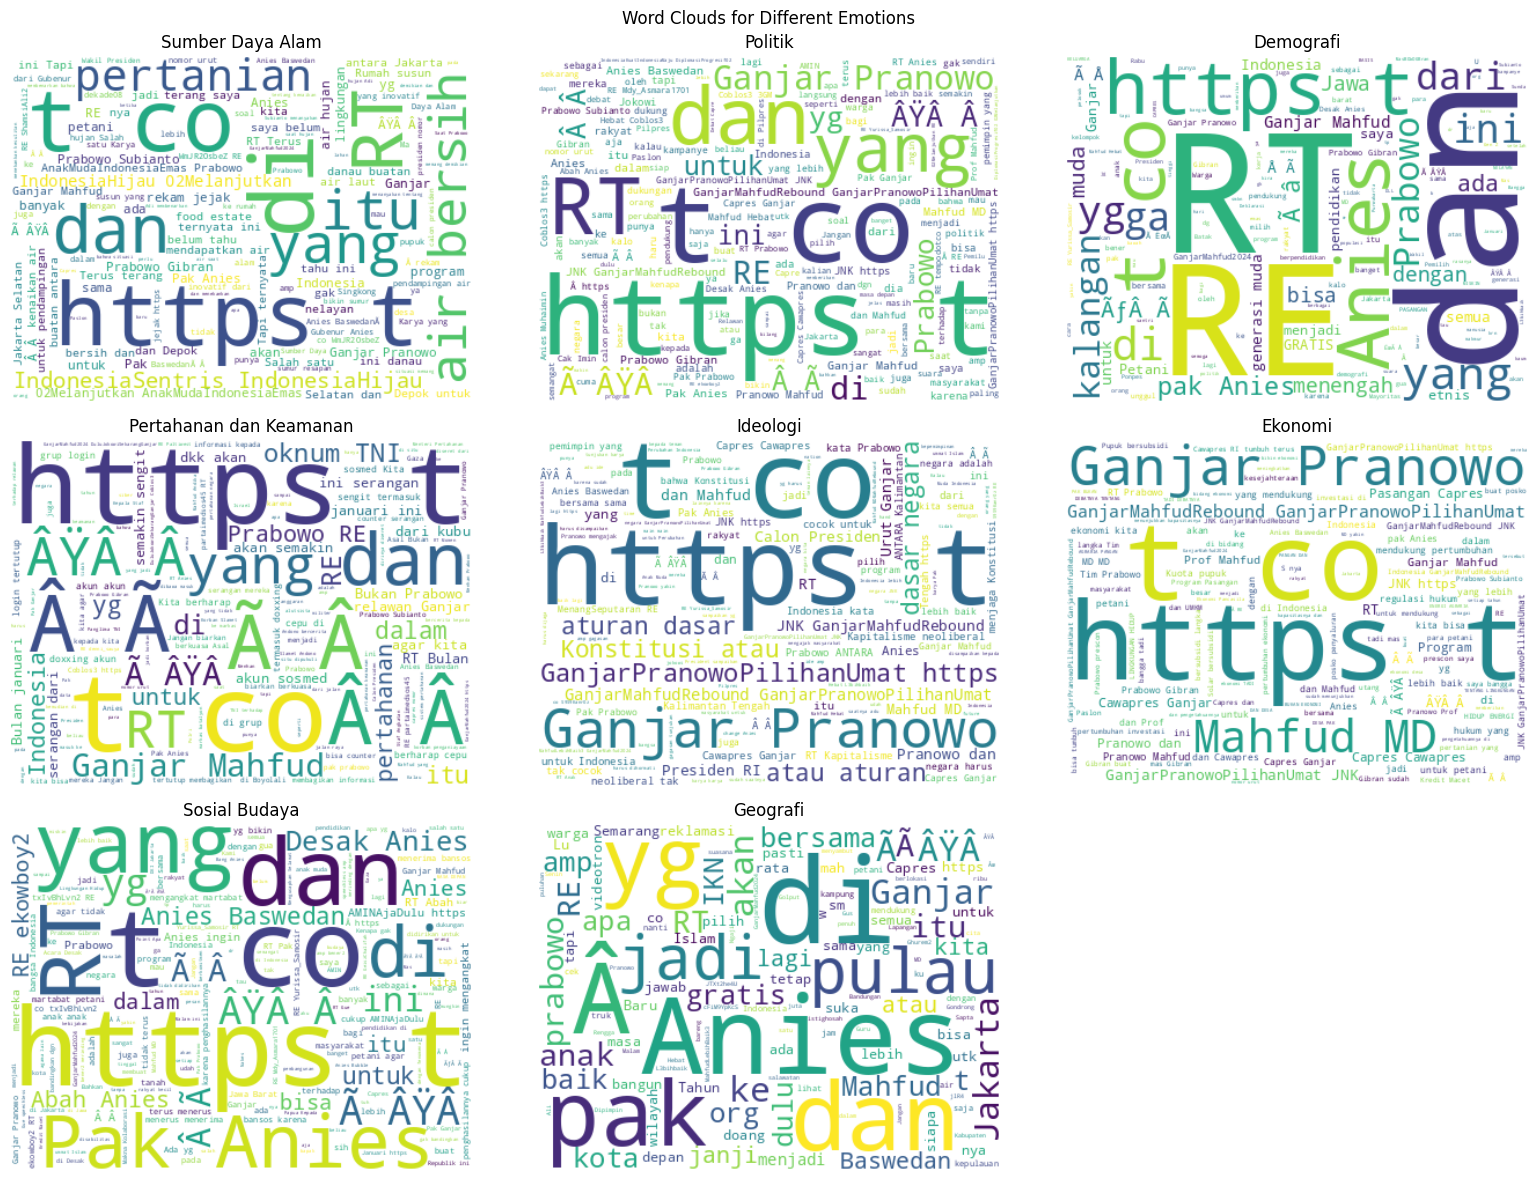

In [ ]:
# Create word clouds for each emotion
emotions = train_textunder1000['label'].unique()
plt.figure(figsize=(16, 12))

# stopwords = set(STOPWORDS)
def word_cloud(data):
    for i, emotion in enumerate(emotions):
        plt.subplot(3, 3, i+1)
        # stopwords=stopwords, max_words=200, max_font_size=40, scale=3, random_state=1
        wordcloud = WordCloud(width=400, height=300, background_color='white').generate(" ".join(data[data['label'] == emotion]['text']))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(emotion)
        plt.axis('off')

    plt.suptitle("Word Clouds for Different Emotions")
    plt.tight_layout()
    plt.show()
word_cloud(train_textunder1000)

In [ ]:
# Remove Link, retweet, hashtag, emojis, and so on

def remove_link(x):
    result = re.sub(r"https?://\S+|www\.\S+", "", x)
    return result.strip()
def remove_retweet(x):
    result = re.sub(r"^RT @[\w_]+:?", "", x)
    return result.strip()

train_textunder1000["text"] = train_textunder1000["text"].apply(lambda x: remove_link(x))
train_textunder1000["text"] = train_textunder1000["text"].apply(lambda x: remove_retweet(x))
train_textunder1000["text"]

/tmp/ipykernel_175/1364998484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_textunder1000["text"] = train_textunder1000["text"].apply(lambda x: remove_link(x))
/tmp/ipykernel_175/1364998484.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_textunder1000["text"] = train_textunder1000["text"].apply(lambda x: remove_retweet(x))


0       Kunjungan Prabowo ini untuk meresmikan dan men...
1       RT Anies dapat tepuk tangan meriah saat jadi R...
2       @CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...
3       /0hHZTbqVGX7qtfwRg9zmhK7Q= Sewaktu anies bersi...
4       Anies Baswedan Harap ASN termasuk TNI dan Polr...
                              ...                        
4995    = Ngeliat debat kemaren pas prabowo kicep, kek...
4996    Masyarakat yakin bahwa Prabowo-Gibran memiliki...
4997    imo both are irrational but yg satu jauh lebih...
4998    @cIIGSdjaPrmAQY1E4gWnLpIZSdyQn8ZMhjJzgOsxfRM= ...
4999    Acara ini tidak hanya memasak, tetapi Calon Pr...
Name: text, Length: 4920, dtype: object

In [ ]:
def clean_text(df):
    df["text"] = df["text"].str.lower()
    df["text"] = df["text"].apply(lambda text: re.sub('\[.*?\]', '', text))
    return df

train_textunder1000 = clean_text(train_textunder1000)
train_textunder1000["text"]

/tmp/ipykernel_175/2424570226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["text"].str.lower()
/tmp/ipykernel_175/2424570226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["text"].apply(lambda text: re.sub('\[.*?\]', '', text))


0       kunjungan prabowo ini untuk meresmikan dan men...
1       rt anies dapat tepuk tangan meriah saat jadi r...
2       @ciqxqwgat04tmtx4ocatxjovq7vv/y8heyaiogmfg8y= ...
3       /0hhztbqvgx7qtfwrg9zmhk7q= sewaktu anies bersi...
4       anies baswedan harap asn termasuk tni dan polr...
                              ...                        
4995    = ngeliat debat kemaren pas prabowo kicep, kek...
4996    masyarakat yakin bahwa prabowo-gibran memiliki...
4997    imo both are irrational but yg satu jauh lebih...
4998    @ciigsdjaprmaqy1e4gwnlpizsdyqn8zmhjjzgosxfrm= ...
4999    acara ini tidak hanya memasak, tetapi calon pr...
Name: text, Length: 4920, dtype: object

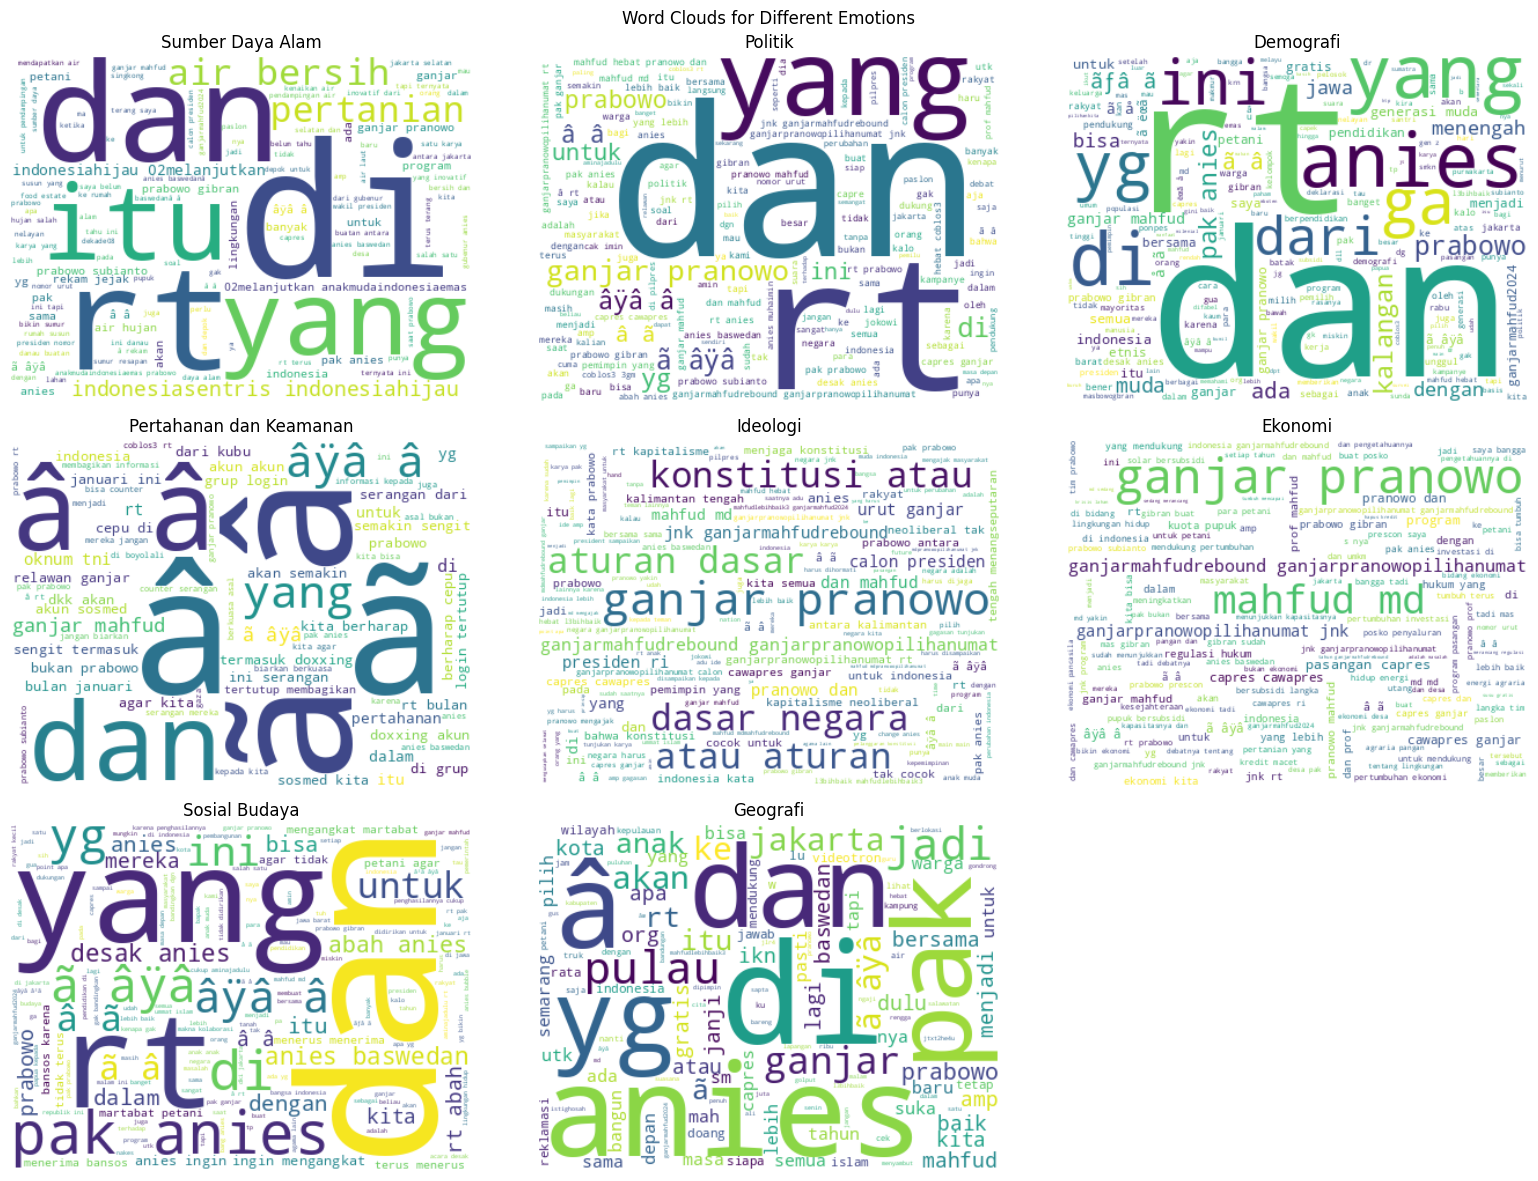

In [ ]:
# Create word clouds for each emotion
emotions = train_textunder1000['label'].unique()
plt.figure(figsize=(16, 12))

# stopwords = set(STOPWORDS)
def word_cloud(data):
    for i, emotion in enumerate(emotions):
        plt.subplot(3, 3, i+1)
        # stopwords=stopwords, max_words=200, max_font_size=40, scale=3, random_state=1
        wordcloud = WordCloud(width=400, height=300, background_color='white').generate(" ".join(data[data['label'] == emotion]['text']))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(emotion)
        plt.axis('off')

    plt.suptitle("Word Clouds for Different Emotions")
    plt.tight_layout()
    plt.show()
word_cloud(train_textunder1000)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=345f8878-fb72-4223-91e4-c32f6cff64f7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>